In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [32]:
#g,h must be positive
#r,s change steepness
#x0,y0 change center

def E(y, z, params = {'s':10, 'y0':0, 'p':-10, 'z0':0}):
    '''
    E(y, z, s=10, y0=0, p = -10, z0=0)
    Reversal potential for the x variable, with slope s & p and center y0 & z0.
    s>0, p<0
    '''
    
    if params is None:
        s=10
        y0=0
        p=-10
        z0=0
    else:
        s = params['s']
        y0 = params['y0']
        p = params['p']
        z0 = params['z0']
        
        
    return 1/(1 + np.exp(-s * (y-y0) - p * (z-z0)))

    #E = np.cos(s * (y-y0))
    
    

def F(x, params = ({'r':10, 'x0':0})):
    '''
    F(x, r=1, x0=0)
    Reversal potential for the y variable, with slope r and center x0.
    '''
    
    if params is None:
        r=10
        x0=0

    else:
        r = params['r']
        x0 = params['x0']
    
    return 1/(1 + np.exp(-r * (x-x0)))

def G(x, params = ({'q':-10, 'z0':0})):
    '''
    Reversal potential for the z variable, with slobe p and center z0.
    '''
    
    if params is None:
        q=-10
        z0=0
    else:
        q = params['q']
        z0 = params['z0']
    
    return 1/(1 + np.exp(-q * (x-z0)))

    


def model(y_in, t, params):
    '''
    model(y_in, t, params)
    Integrates E and F, where g and h can be other functions but in this case are constants.
    g and h must be posiitve.
    m<h
    '''
    
    if params is None:
        g=2
        h=4
        m=3
        E=E
        F=F
        G=G
        s=10
        y0=0
        p=-10
        z0=0
        

    else:        
        g = params['g']
        h = params['h']
        m = params['m']
        E = params['E']
        F = params['F']
        G = params['G']
        s = params['s']
        y0 = params['y0']
        p = params['p']
        z0 = params['z0']
        
        
    x = y_in[0]
    y = y_in[1]
    z = y_in[2]
    
    
    dxdt = g * (E(y,z)-x , {'s':s,'y0':y0,'p':p,'z0':z0})
    dydt = h * (F(x)-y)
    dzdt = m * (G(x)-z)
    
    return [dxdt, dydt, dzdt]

def phase_plane(model, E, F, G, g=2, h=3, m=4,s=10, y0=0, p=-10, z0=0):
    '''
    plots phase plane of integrated model and nullclines.
    '''
    
    fig0, ax0 = plt.subplots(1,1,figsize=(8,8))
    
    t = np.linspace(0, 5, 100)
    
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    z = np.linspace(-5,5,100)
    
    
    plt.plot(x,F(x),'k',linewidth = 2)
    plt.plot(E(y,z),y, 'k', linewidth = 2)
    
    for x in range(-4,5,2):
        for y in range(-4,5,2):
            for z in range(-4,5,2):
                y_out = odeint(model, [x,y,z], t, args = ({'g':g,'h':h,'m':m,'E':E,'F':F,'G':G,'s':s,'y0':y0,'p':p,'z0':z0},))
                plt.plot(y_out[:,0],y_out[:,1])
   
    plt.axis([-4,4,-4,4])
    plt.xlabel('x', fontsize = 18)
    plt.ylabel('y', fontsize = 18)
    plt.grid()
    

TypeError: can't multiply sequence by non-int of type 'dict'

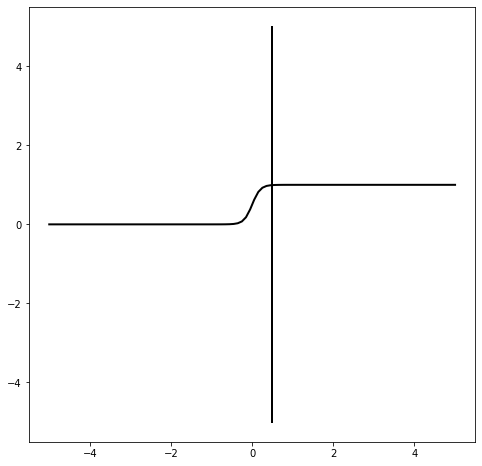

In [33]:
phase_plane(model, E, F, G, {'s':15,'y0':0,'p':-10,'z0':0})